# Classification of Images in the CIFAR-10 Dataset using CNNs

## Import the Data

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#load CIFAR-10 dataset
from keras.datasets import cifar10
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()

In [3]:
#Data shape 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


## Visualize the Data

[5]


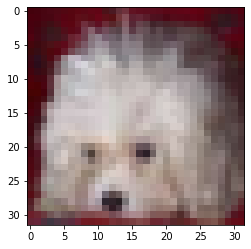

In [4]:
i = 5555 #random image
plt.imshow(X_train[i]) #print image
print(y_train[i]) #print image's label

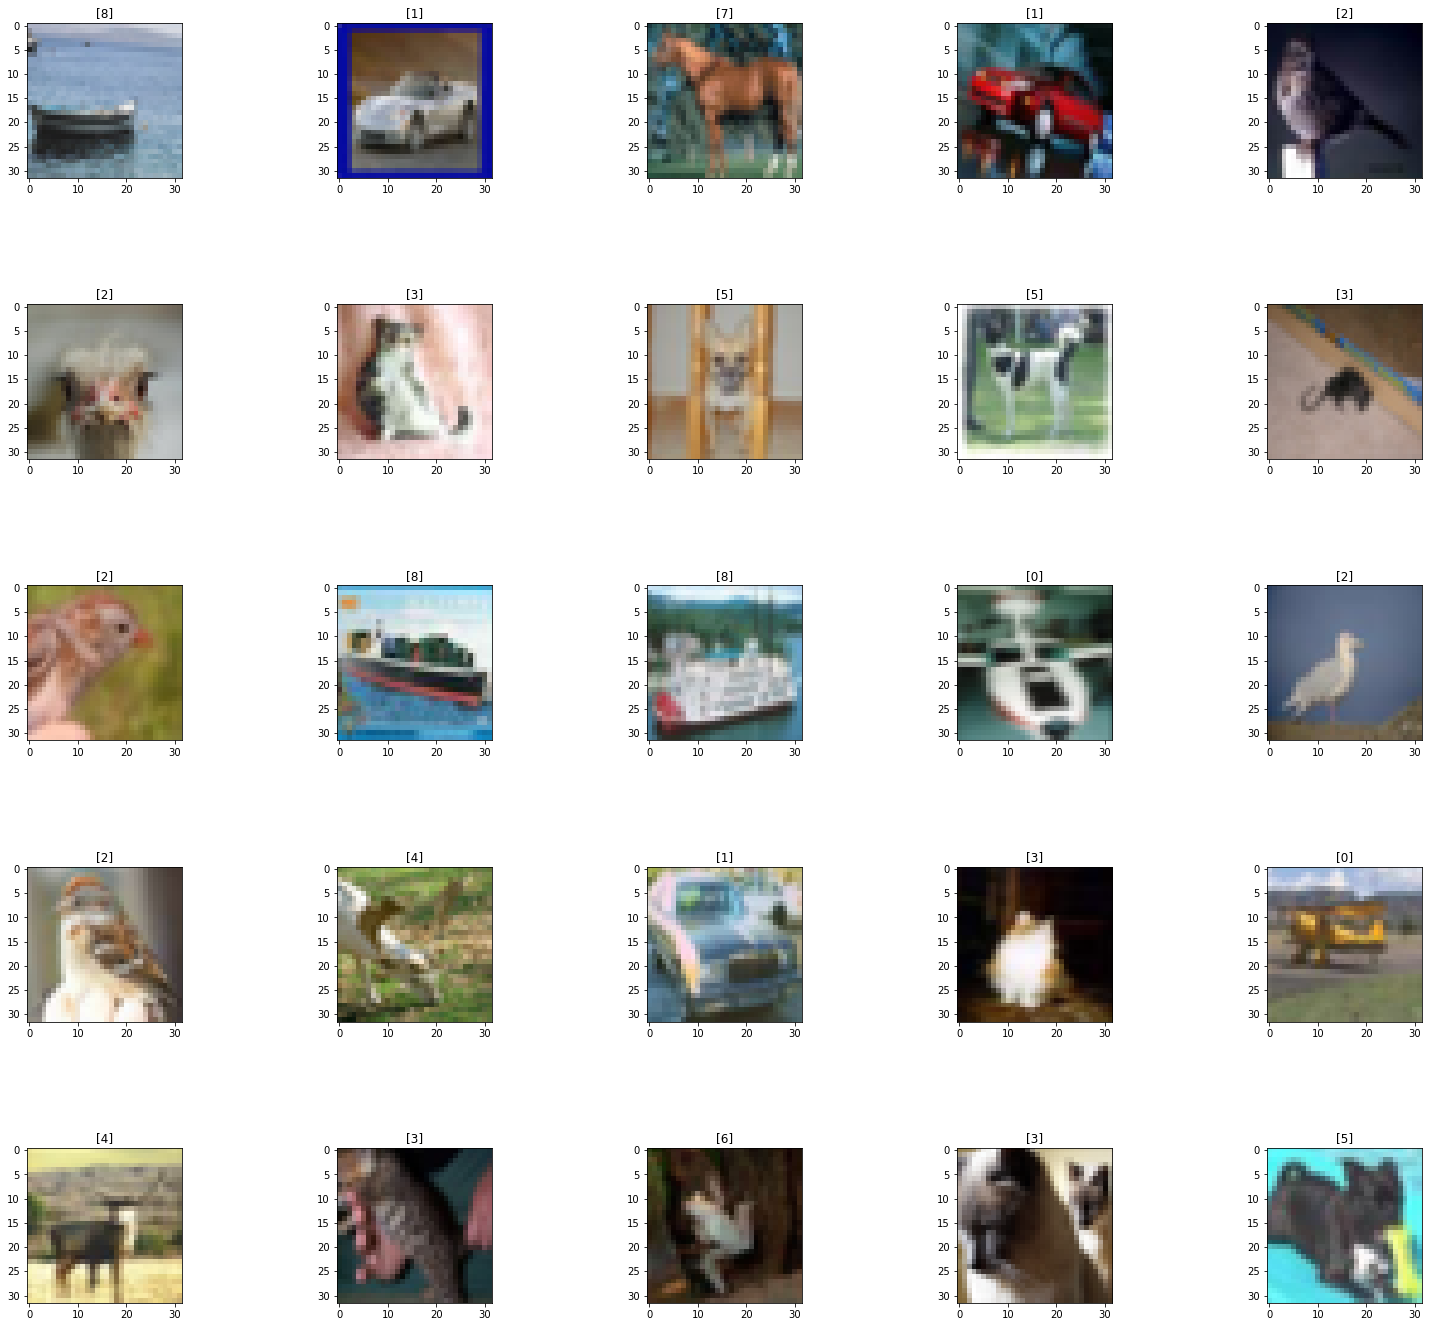

In [5]:
#visualize the data as a grid 
length = 5
width= 5
fig, axes = plt.subplots(length, width, figsize=(25,25)) #create a grid to display the images 
axes = axes.ravel()

n_training = len(X_train) #50000 

for i in np.arange(0, length*width):
    index = np.random.randint(0, n_training) #pick a random image to dispaly
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])

plt.subplots_adjust(wspace = 1)

## Data Cleaning and Preparation

In [6]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [7]:
num_category = 10 #10 categories in the dataset

In [8]:
import keras 
y_train = keras.utils.to_categorical(y_train, num_category)
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [9]:
y_test = keras.utils.to_categorical(y_test, num_category)
print(y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [10]:
#normalize the data 
X_train = X_train/255
X_test = X_test/255

In [11]:
print(X_train)

[[[[0.23137255 0.24313726 0.24705882]
   [0.16862746 0.18039216 0.1764706 ]
   [0.19607843 0.1882353  0.16862746]
   ...
   [0.61960787 0.5176471  0.42352942]
   [0.59607846 0.49019608 0.4       ]
   [0.5803922  0.4862745  0.40392157]]

  [[0.0627451  0.07843138 0.07843138]
   [0.         0.         0.        ]
   [0.07058824 0.03137255 0.        ]
   ...
   [0.48235294 0.34509805 0.21568628]
   [0.46666667 0.3254902  0.19607843]
   [0.47843137 0.34117648 0.22352941]]

  [[0.09803922 0.09411765 0.08235294]
   [0.0627451  0.02745098 0.        ]
   [0.19215687 0.10588235 0.03137255]
   ...
   [0.4627451  0.32941177 0.19607843]
   [0.47058824 0.32941177 0.19607843]
   [0.42745098 0.28627452 0.16470589]]

  ...

  [[0.8156863  0.6666667  0.3764706 ]
   [0.7882353  0.6        0.13333334]
   [0.7764706  0.6313726  0.10196079]
   ...
   [0.627451   0.52156866 0.27450982]
   [0.21960784 0.12156863 0.02745098]
   [0.20784314 0.13333334 0.07843138]]

  [[0.7058824  0.54509807 0.3764706 ]
   [0.6

In [12]:
print(X_test)

[[[[0.61960787 0.4392157  0.19215687]
   [0.62352943 0.43529412 0.18431373]
   [0.64705884 0.45490196 0.2       ]
   ...
   [0.5372549  0.37254903 0.14117648]
   [0.49411765 0.35686275 0.14117648]
   [0.45490196 0.33333334 0.12941177]]

  [[0.59607846 0.4392157  0.2       ]
   [0.5921569  0.43137255 0.15686275]
   [0.62352943 0.44705883 0.1764706 ]
   ...
   [0.53333336 0.37254903 0.12156863]
   [0.49019608 0.35686275 0.1254902 ]
   [0.46666667 0.34509805 0.13333334]]

  [[0.5921569  0.43137255 0.18431373]
   [0.5921569  0.42745098 0.12941177]
   [0.61960787 0.43529412 0.14117648]
   ...
   [0.54509807 0.38431373 0.13333334]
   [0.50980395 0.37254903 0.13333334]
   [0.47058824 0.34901962 0.12941177]]

  ...

  [[0.26666668 0.4862745  0.69411767]
   [0.16470589 0.39215687 0.5803922 ]
   [0.12156863 0.34509805 0.5372549 ]
   ...
   [0.14901961 0.38039216 0.57254905]
   [0.05098039 0.2509804  0.42352942]
   [0.15686275 0.33333334 0.49803922]]

  [[0.23921569 0.45490196 0.65882355]
   [0.1

In [13]:
print(X_train.shape)

(50000, 32, 32, 3)


In [14]:
inp_shape = X_train.shape[1:]
print(inp_shape)

(32, 32, 3)


## Train the Model

In [15]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [16]:
#build the model and add layers 
def create_cnn_model():
    cnn_model = Sequential()
    #first convolution 
    cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape = inp_shape)) #convolutional layer 1
    cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu')) #convolutional layer 2
    cnn_model.add(MaxPooling2D(pool_size = (2,2))) #perform maxpooling/ downsizing 
    cnn_model.add(Dropout(0.4)) #add dropout for regularization 
    #second convolution 
    cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu')) #convolutional layer 1
    cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
    cnn_model.add(MaxPooling2D(pool_size = (2,2))) #perform maxpooling/ downsizing 
    cnn_model.add(Dropout(0.4))
    #flattening 
    cnn_model.add(Flatten())
    #create a fully connected network 
    cnn_model.add(Dense(1024, activation = 'relu'))
    cnn_model.add(Dense(1024, activation = 'relu'))
    #output layer 
    #output layer will need 10 units as there a 10 categories in the dataset 
    cnn_model.add(Dense(10, activation = 'softmax'))
    return cnn_model

In [17]:
cnn_model = create_cnn_model()

In [18]:
cnn_model.compile(loss='categorical_crossentropy', optimizer = keras.optimizers.RMSprop(lr = 0.001), metrics = ['accuracy'])

In [19]:
history = cnn_model.fit(X_train, y_train, batch_size = 32, epochs = 1, shuffle = True)

1563/1563 [==============================] - 390s 249ms/step - loss: 1.6205 - accuracy: 0.4182


## Model Evaluation

In [20]:
evaluation = cnn_model.evaluate(X_test, y_test)

313/313 [==============================] - 19s 61ms/step - loss: 1.3288 - accuracy: 0.5040


In [21]:
prediction = cnn_model.predict_classes(X_test)
print(prediction)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[3 8 8 ... 5 3 7]


In [22]:
y_test = y_test.argmax(1)
print(prediction)
print(y_test)

[3 8 8 ... 5 3 7]
[3 8 8 ... 5 1 7]


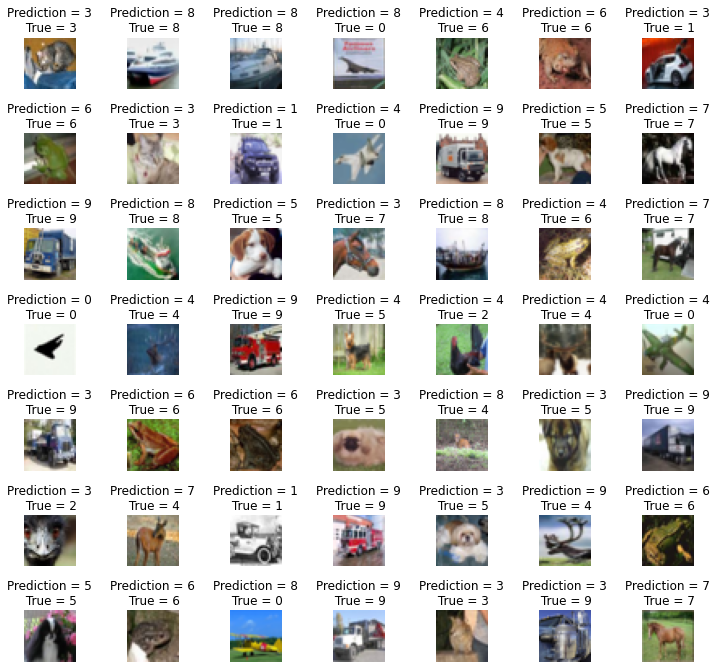

In [23]:
grid_length = 7
grid_width = 7
fig, axes = plt.subplots(grid_length, grid_width, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0,grid_length*grid_width):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(prediction[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1) 

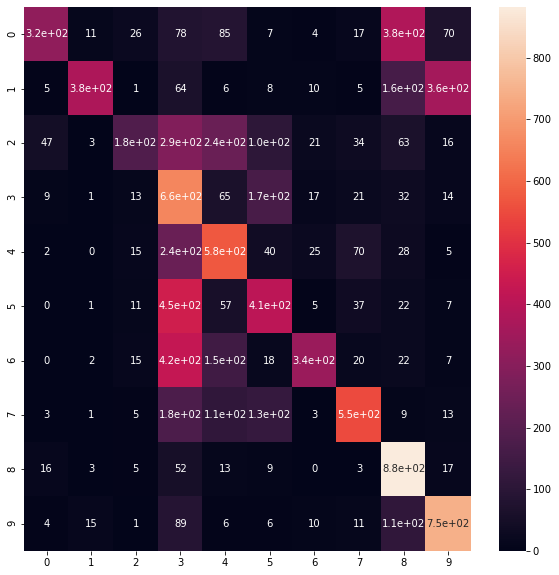

In [24]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, prediction)
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot = True)

## Save the Model

In [25]:
import os 

directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'cifar10_keras_trained_model.h5')
cnn_model.save(model_path)